# Lab Instructions

Create 3 visualizations from a spatial and time-series dataset of your choice.  Describe your dataset including where it came from and the features it contains.  Each visualization should be accompanied by at least 1 - 2 sentences explaining how the features do (or do not!) change over time and througout space.

The data I will be using comes from Kaggle. It holds the recorded temperatures of each month and year around the world, all chunked primarily through different city and state records. This dataset is about recording the global changes in our climate, from the 1800's to the late 2010's. The data can either be viewed through a specific city, or by averaging each cities' data for a total look at the specific state or country's change in local climate. 
The features included are temperature index for the month, for each city, state, or country along with the latitude and longitude

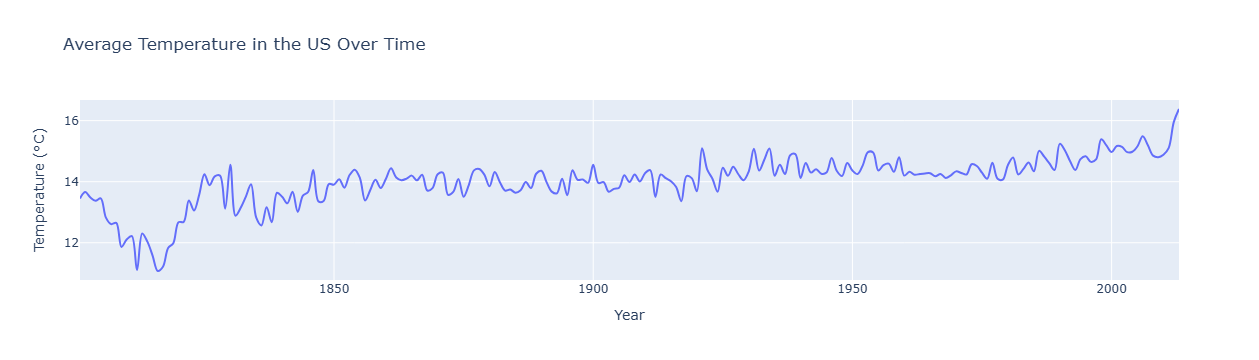

In [7]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("GlobalLandTemperaturesByCity.csv")
df['dt'] = pd.to_datetime(df['dt'])
df = df[df['Country'] == "United States"]

df['year'] = df['dt'].dt.year
us_temp = df[df['year'] > 1800].groupby('year')['AverageTemperature'].mean().reset_index()

fig = px.line(us_temp, x="year", y="AverageTemperature", title="Average Temperature in the US Over Time", 
              labels={"year": "Year", "AverageTemperature": "Temperature (°C)"}, line_shape="spline")
fig.show()

The data shows the historic drop in the average temperature in America throughout the early 1800s, followed by the steady increase after the Industrial Revolution. 

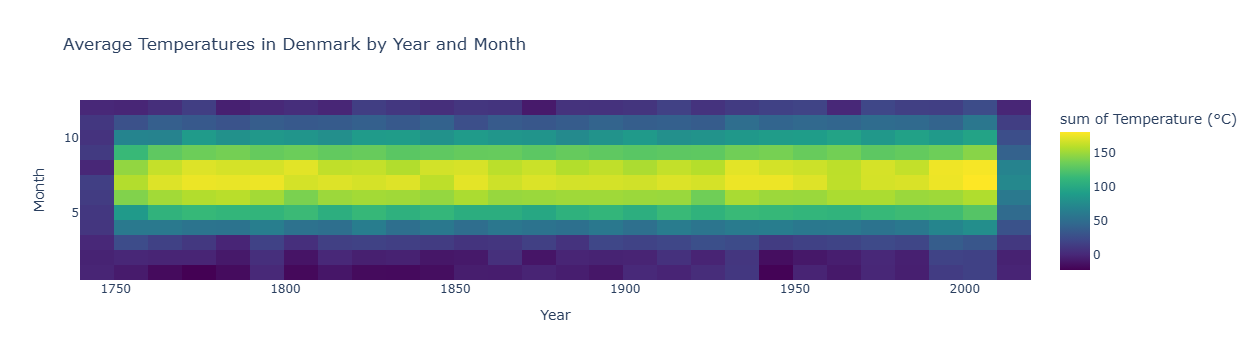

In [15]:
df = pd.read_csv("GlobalLandTemperaturesByCity.csv")
df['dt'] = pd.to_datetime(df['dt'])
df = df[df['Country'] == "Denmark"]

df['year'] = df['dt'].dt.year
df['month'] = df['dt'].dt.month

heatmap_data = df.groupby(['year', 'month'])['AverageTemperature'].mean().reset_index()

fig = px.density_heatmap(heatmap_data, x="year", y="month", z="AverageTemperature", color_continuous_scale="Viridis",
    title="Average Temperatures in Denmark by Year and Month", labels={"year": "Year", "month": "Month", "AverageTemperature": "Temperature (°C)"},
    nbinsx=50, nbinsy=12
)
fig.show()

This graph shows the overall average temperature for each month of the year. This graph shows the steady incline upwards, until the severe cold waves that hit Denmark in the last recorded Decade. 

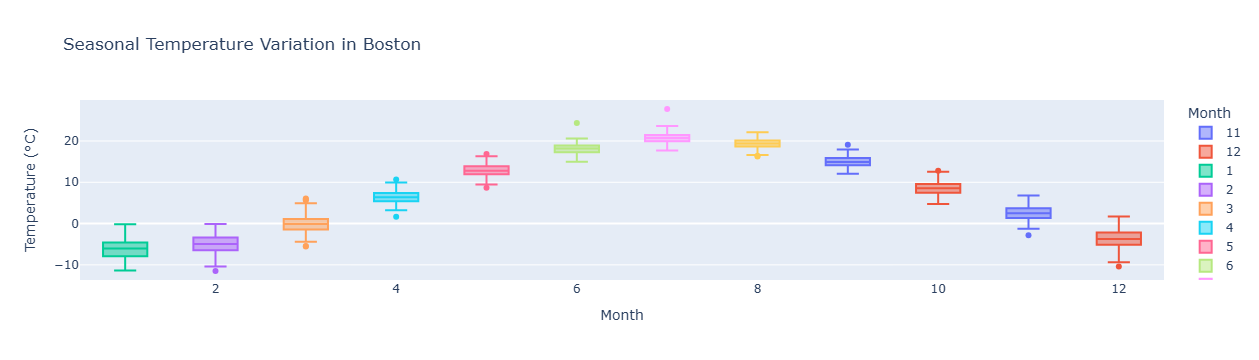

In [14]:
ny = df[df['City'] == "Boston"].copy()
ny['month'] = ny['dt'].dt.month

fig = px.box(ny, x="month", y="AverageTemperature", title="Seasonal Temperature Variation in Boston", 
             labels={"month": "Month", "AverageTemperature": "Temperature (°C)"}, color="month")
fig.show()

This graph shows the average temperatures in each month of boston throughout the year. Each box shows the minimum and maximum recorded values for that month.